# Gradient Boosting Regressor

## Used in projects

* Vykonia

## Information Sources

Scikit-learn:
* [scikit API](http://scikit-learn.org/stable/modules/classes.html)
* [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)
* [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
* [learning curve sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
* [learning curve documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)

Other sources
* [parameter tuning](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

## Parameters and their tuning

General and **nice** info can be found [here](* [parameter tuning](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)


**THIS WAS FOR CLASSIFICATION**
Keeping all this in mind, we can take the following approach:
	1. Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
	2. Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
	3. Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
	4. Lower the learning rate and increase the estimators proportionally to get more robust models.


Loss function
* Defaultní je least squared.    

Boosting parameters:
* n_estimators
    - počet stromů $B$
    - výchozí 100
* learning_rate:
    - shrinkage $\lambda$
    - výchozí 0.1
    - obvykle 0.01 - 0.001, nebo 0.2-0.05
    
Tree specific parameters:
* max_depth
    - ~počet dělení, resp. max. počet dělení je 2^(max_depth)
    - podle počtu pozorování
* min_samples_split
    - 0.5-1% vzorku, ale je dost závislé na úloze
* min_samples_leaf
    - hodně podle intuice
    - menší hodnoty pro inbalance classes
* max_features
    - obvykle odmocnina z počtu
* subsample:
    - vede ke stochastickému gradientu pokud je <1
    - obvykle ale kolem 0.8    

Miscellaneous Parameters:



## Knihovny

In [23]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import time

%matplotlib notebook

#model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error,r2_score, make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

## Data

In [41]:
n = 200
p = 1
noise_std = 5
(X,Y) = make_regression(
    n_samples = n,
    n_features = p,
    noise = noise_std
)
X = pd.DataFrame(X, columns = {"x1"})
Y = pd.DataFrame(Y, columns = {"y1"})

In [42]:
X.head()

,x1
0,-1.073184
1,-0.913175
2,-1.321791
3,-0.808105
4,0.477918


In [43]:
Y.head()

,y1
0,-105.448018
1,-95.861084
2,-125.245250
3,-70.662154
4,46.726269


<IPython.core.display.Javascript object>


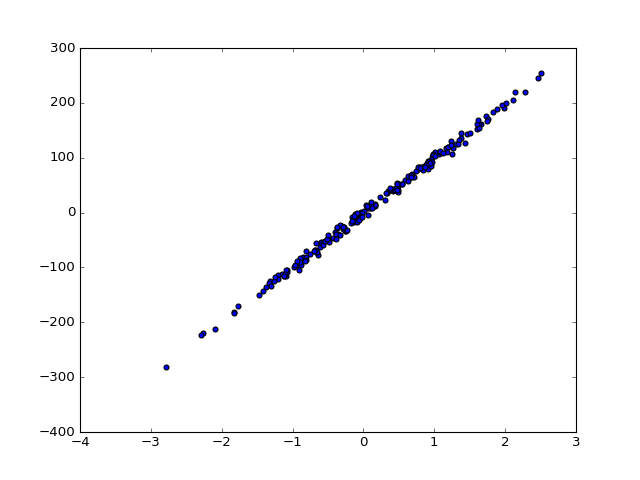

In [44]:
plt.scatter(X,Y)

## Learning Curve

In [45]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    #if ylim is not None:
    #    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    my_scorer = make_scorer(mean_squared_error)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = my_scorer)
    
    print(train_sizes)
    print(train_scores)
    print(test_scores)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Variable setting

In [46]:
#variable setting
X = X
y = Y["y1"]

## Model setting

In [47]:
par_B = 500 #def 100
par_lambda = 0.1 #def 0.1
par_max_depth = 8 #def 3

par_min_samples_split = n/1000
#par_min_sample_leaf = X.shape

cv_n_split = 6

my_scorer = make_scorer(mean_squared_error)
#my_scorer = make_scorer(r2_score)

title = "Learning Curve " + "GBM "+ str(par_B) + " " + str(par_lambda) + " " + str(par_max_depth)

## Single model learning

In [49]:
start_time = time.time()

my_model = GradientBoostingRegressor(
    n_estimators = par_B,
    learning_rate = par_lambda,
    max_depth = par_max_depth,
    min_samples_split = par_min_samples_split
)

my_model.fit(
    X,
    y
)

print("Model learning: % .4f minutes ---" % ((time.time() - start_time)/60))
print(title)

Model learning:  0.0017 minutes ---
Learning Curve GBM 500 0.1 8


In [54]:
start_time = time.time()
my_model.predict(X.iloc[0].values.reshape(1,-1))
print("Model prediction: % .6f seconds ---" % ((time.time() - start_time)))
print(title)

Model prediction:  0.001003 seconds ---
Learning Curve GBM 500 0.1 8


## Cross-validation learning

In [56]:
start_time = time.time()

#validation sets --------------------------------------------------------------------------

#model -------------------------------------------------------------------------------------
my_model = GradientBoostingRegressor(
    n_estimators = par_B,
    learning_rate = par_lambda,
    max_depth = par_max_depth,
    min_samples_split = par_min_samples_split
)

#cross-validation --------------------------------------------------------------------------
my_val = cross_val_score(
    my_model,
    X,
    y,
    cv = 5,
    scoring = my_scorer
)

print(title)
print(my_val)
print("Mean:",my_val.mean(),"Std:",my_val.std())
print("Model learning: % .4f minutes ---" % ((time.time() - start_time)/60))

Learning Curve GBM 500 0.1 8
[  48.55714582   50.86834415  145.2259938    75.9547967    72.76029994]
Mean: 78.673316084 Std: 35.0762403774
Model learning:  0.0075 minutes ---


## Boosting parameter tuning

In [58]:
start_time = time.time()

#validation sets --------------------------------------------------------------------------
cv = 5

#model -------------------------------------------------------------------------------------
my_model = GradientBoostingRegressor(
    min_samples_split = par_min_samples_split
)

#model parameters --------------------------------------------------------------------------
#list(range(60,120,40)
my_model_parameters = {
    "n_estimators":[400, 600, 800],
    "learning_rate":[0.1],
    "max_depth":[6,8,10]  
}

#grid search -------------------------------------------------------------------------------
clf = GridSearchCV(
    estimator = my_model, 
    param_grid = my_model_parameters,
    cv = cv,
    n_jobs = 6,
    scoring = my_scorer
)
clf.fit(X, y)

print("Model learning: % .4f minutes ---" % ((time.time() - start_time)/60))

Model learning:  0.1912 minutes ---


## Setting parameters as dictionaries - good for testing

* [zdroj](http://stackoverflow.com/questions/33110973/pass-a-dict-to-scikit-learn-estimator)

In [69]:
par1 = {}
par2 = {"n_estimators":100, "learning_rate":0.01}

In [70]:
par_model = GradientBoostingRegressor(**{**par1,**par2})

In [71]:
par_model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [72]:
"ahoj"=="ahoj"

True

## Playground

In [74]:
model1 = GradientBoostingRegressor()
model1

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [80]:
model2 = model1
model1

AttributeError: 'GradientBoostingRegressor' object has no attribute 'copy'

In [77]:
model2.set_params(**par2)
model2

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [78]:
model1

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [ ]:
model1.